In [233]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [234]:
# Loading the dataset to a pandas dataframe

diabetes_dataset = pd.read_csv('diabetes_data.csv')

In [235]:
diabetes_dataset.head()

,Age,Class_Positive,Gender_Male,Polyuria_Yes,Polydipsia_Yes,Sudden Weight Loss_Yes,weakness_Yes,Polyphagia_Yes,Genital thrush_Yes,visual blurring_Yes,Itching_Yes,Irritability_Yes,delayed healing_Yes,partial paresis_Yes,muscle stiffness_Yes,Alopecia_Yes,Obesity_Yes
0,40,1,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


In [236]:
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     520 non-null    int64
 1   Class_Positive          520 non-null    int64
 2   Gender_Male             520 non-null    int64
 3   Polyuria_Yes            520 non-null    int64
 4   Polydipsia_Yes          520 non-null    int64
 5   Sudden Weight Loss_Yes  520 non-null    int64
 6   weakness_Yes            520 non-null    int64
 7   Polyphagia_Yes          520 non-null    int64
 8   Genital thrush_Yes      520 non-null    int64
 9   visual blurring_Yes     520 non-null    int64
 10  Itching_Yes             520 non-null    int64
 11  Irritability_Yes        520 non-null    int64
 12  delayed healing_Yes     520 non-null    int64
 13  partial paresis_Yes     520 non-null    int64
 14  muscle stiffness_Yes    520 non-null    int64
 15  Alopecia_Yes           

<Axes: xlabel='Class_Positive', ylabel='Age'>

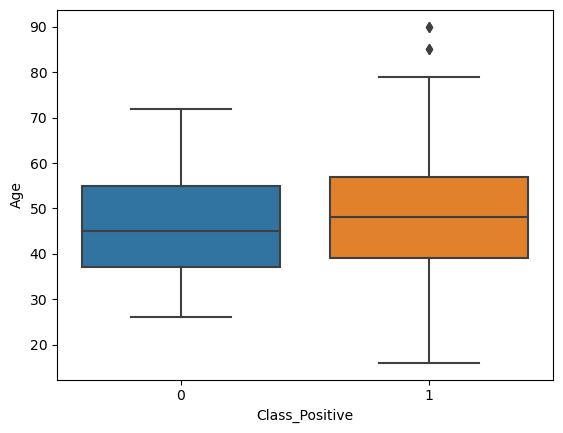

In [237]:
sns.boxplot(x='Class_Positive', y='Age', data=diabetes_dataset)

<Axes: ylabel='Frequency'>

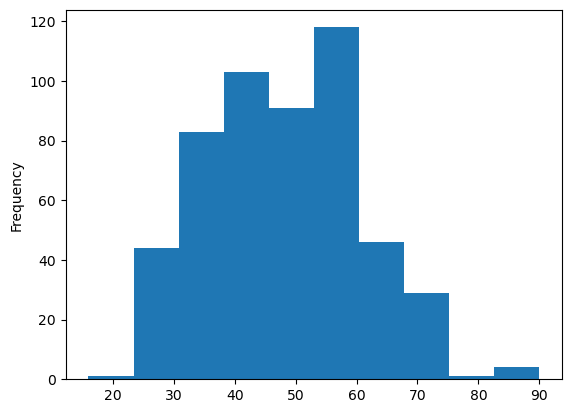

In [238]:
diabetes_dataset['Age'].plot.hist()

<Axes: ylabel='Frequency'>

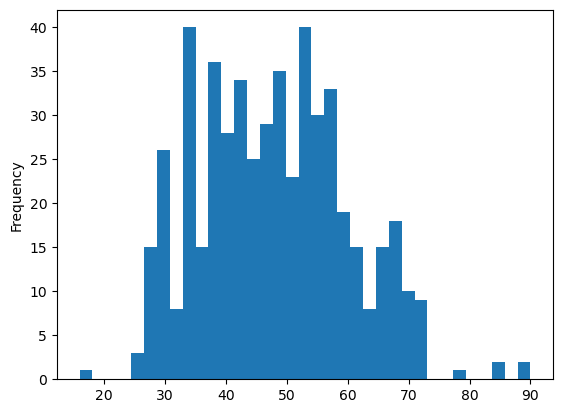

In [239]:
diabetes_dataset['Age'].plot.hist(bins=35)

In [240]:
diabetes_dataset.Age.min()

16

In [241]:
diabetes_dataset.Age.max()

90

In [242]:
diabetes_dataset.Age.describe()

count    520.000000
mean      48.028846
std       12.151466
min       16.000000
25%       39.000000
50%       47.500000
75%       57.000000
max       90.000000
Name: Age, dtype: float64

In [243]:
diabetes_dataset.Age.value_counts()

35    30
48    28
30    25
43    25
40    24
55    22
47    21
38    20
53    20
45    18
58    18
50    18
54    16
39    16
57    15
60    15
68    10
28     9
42     9
72     9
66     9
36     8
61     8
56     8
46     8
67     8
62     7
37     7
49     7
44     7
27     6
34     6
65     6
32     5
69     5
51     5
70     5
64     5
33     4
59     4
41     4
52     4
63     3
31     3
90     2
85     2
25     2
79     1
16     1
29     1
26     1
Name: Age, dtype: int64

In [244]:
upper_limit = diabetes_dataset.Age.mean() + 3*diabetes_dataset.Age.std()
upper_limit

84.48324413959455

In [245]:
lower_limit = diabetes_dataset.Age.mean() - 3*diabetes_dataset.Age.std()
lower_limit

11.574448168097767

In [246]:
diabetes_dataset[(diabetes_dataset.Age > upper_limit) | (diabetes_dataset.Age < lower_limit)]

,Age,Class_Positive,Gender_Male,Polyuria_Yes,Polydipsia_Yes,Sudden Weight Loss_Yes,weakness_Yes,Polyphagia_Yes,Genital thrush_Yes,visual blurring_Yes,Itching_Yes,Irritability_Yes,delayed healing_Yes,partial paresis_Yes,muscle stiffness_Yes,Alopecia_Yes,Obesity_Yes
101,85,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,0
102,90,1,0,0,1,1,0,0,1,1,1,0,0,0,1,1,0
185,85,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,0
186,90,1,0,0,1,1,0,0,1,1,1,0,0,0,1,1,0


In [247]:
diabetes_dataset[(diabetes_dataset.Age < upper_limit) & (diabetes_dataset.Age > lower_limit)]

,Age,Class_Positive,Gender_Male,Polyuria_Yes,Polydipsia_Yes,Sudden Weight Loss_Yes,weakness_Yes,Polyphagia_Yes,Genital thrush_Yes,visual blurring_Yes,Itching_Yes,Irritability_Yes,delayed healing_Yes,partial paresis_Yes,muscle stiffness_Yes,Alopecia_Yes,Obesity_Yes
0,40,1,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,1,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0
516,48,1,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0
517,58,1,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1
518,32,0,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0


In [248]:
diabetes_dataset_no_outliers = diabetes_dataset[(diabetes_dataset.Age < upper_limit) & (diabetes_dataset.Age > lower_limit)]

In [249]:
diabetes_dataset_no_outliers.shape

(516, 17)

# Z Score Method

In [250]:
diabetes_dataset['zscore'] = (diabetes_dataset.Age - diabetes_dataset.Age.mean())/diabetes_dataset.Age.std()

In [251]:
diabetes_dataset.head()

,Age,Class_Positive,Gender_Male,Polyuria_Yes,Polydipsia_Yes,Sudden Weight Loss_Yes,weakness_Yes,Polyphagia_Yes,Genital thrush_Yes,visual blurring_Yes,Itching_Yes,Irritability_Yes,delayed healing_Yes,partial paresis_Yes,muscle stiffness_Yes,Alopecia_Yes,Obesity_Yes,zscore
0,40,1,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,-0.660731
1,58,1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0.820572
2,41,1,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,-0.578436
3,45,1,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,-0.249258
4,60,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0.985161


In [252]:
diabetes_dataset[diabetes_dataset['zscore']>3]

,Age,Class_Positive,Gender_Male,Polyuria_Yes,Polydipsia_Yes,Sudden Weight Loss_Yes,weakness_Yes,Polyphagia_Yes,Genital thrush_Yes,visual blurring_Yes,Itching_Yes,Irritability_Yes,delayed healing_Yes,partial paresis_Yes,muscle stiffness_Yes,Alopecia_Yes,Obesity_Yes,zscore
101,85,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,0,3.042526
102,90,1,0,0,1,1,0,0,1,1,1,0,0,0,1,1,0,3.453999
185,85,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,0,3.042526
186,90,1,0,0,1,1,0,0,1,1,1,0,0,0,1,1,0,3.453999


In [253]:
diabetes_dataset[diabetes_dataset['zscore']<-3]

,Age,Class_Positive,Gender_Male,Polyuria_Yes,Polydipsia_Yes,Sudden Weight Loss_Yes,weakness_Yes,Polyphagia_Yes,Genital thrush_Yes,visual blurring_Yes,Itching_Yes,Irritability_Yes,delayed healing_Yes,partial paresis_Yes,muscle stiffness_Yes,Alopecia_Yes,Obesity_Yes,zscore


In [254]:
diabetes_dataset[(diabetes_dataset.zscore < -3) | (diabetes_dataset.zscore > 3)]

,Age,Class_Positive,Gender_Male,Polyuria_Yes,Polydipsia_Yes,Sudden Weight Loss_Yes,weakness_Yes,Polyphagia_Yes,Genital thrush_Yes,visual blurring_Yes,Itching_Yes,Irritability_Yes,delayed healing_Yes,partial paresis_Yes,muscle stiffness_Yes,Alopecia_Yes,Obesity_Yes,zscore
101,85,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,0,3.042526
102,90,1,0,0,1,1,0,0,1,1,1,0,0,0,1,1,0,3.453999
185,85,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,0,3.042526
186,90,1,0,0,1,1,0,0,1,1,1,0,0,0,1,1,0,3.453999


In [255]:
diabetes_data_no_outlier = diabetes_dataset[(diabetes_dataset.zscore > -3) & (diabetes_dataset.zscore < 3)]

In [256]:
diabetes_data_no_outlier.head()

,Age,Class_Positive,Gender_Male,Polyuria_Yes,Polydipsia_Yes,Sudden Weight Loss_Yes,weakness_Yes,Polyphagia_Yes,Genital thrush_Yes,visual blurring_Yes,Itching_Yes,Irritability_Yes,delayed healing_Yes,partial paresis_Yes,muscle stiffness_Yes,Alopecia_Yes,Obesity_Yes,zscore
0,40,1,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,-0.660731
1,58,1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0.820572
2,41,1,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,-0.578436
3,45,1,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,-0.249258
4,60,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0.985161


In [257]:
diabetes_data_no_outlier.shape

(516, 18)

In [258]:
diabetes_dataset_no_outliers.head()

,Age,Class_Positive,Gender_Male,Polyuria_Yes,Polydipsia_Yes,Sudden Weight Loss_Yes,weakness_Yes,Polyphagia_Yes,Genital thrush_Yes,visual blurring_Yes,Itching_Yes,Irritability_Yes,delayed healing_Yes,partial paresis_Yes,muscle stiffness_Yes,Alopecia_Yes,Obesity_Yes
0,40,1,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


In [259]:
X = diabetes_dataset_no_outliers.drop(columns='Class_Positive', axis=1)
Y = diabetes_dataset_no_outliers['Class_Positive']

In [260]:
X

,Age,Gender_Male,Polyuria_Yes,Polydipsia_Yes,Sudden Weight Loss_Yes,weakness_Yes,Polyphagia_Yes,Genital thrush_Yes,visual blurring_Yes,Itching_Yes,Irritability_Yes,delayed healing_Yes,partial paresis_Yes,muscle stiffness_Yes,Alopecia_Yes,Obesity_Yes
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0


In [261]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
515    1
516    1
517    1
518    0
519    0
Name: Class_Positive, Length: 516, dtype: int64

In [262]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify = Y, random_state=101)

In [263]:
print(X.shape, X_train.shape, X_test.shape)

(516, 16) (361, 16) (155, 16)


Comparing the performance of the models

In [264]:
# list of models
models = [LogisticRegression(max_iter=1000), SVC(kernel='linear'), KNeighborsClassifier(), RandomForestClassifier(), 
         DecisionTreeClassifier()]

In [265]:
def compare_models_train_test():

  for model in models:

    # training the model
    model.fit(X_train, Y_train)

    # evaluating the model
    test_data_prediction = model.predict(X_test)

    accuracy = accuracy_score(Y_test, test_data_prediction)

    print('Accuracy score of the ', model, ' = ', accuracy)

In [266]:
compare_models_train_test()

Accuracy score of the  LogisticRegression(max_iter=1000)  =  0.9032258064516129
Accuracy score of the  SVC(kernel='linear')  =  0.9225806451612903
Accuracy score of the  KNeighborsClassifier()  =  0.8516129032258064
Accuracy score of the  RandomForestClassifier()  =  0.9741935483870968
Accuracy score of the  DecisionTreeClassifier()  =  0.9354838709677419


# Cross Validation

**Logistic Regression**

In [267]:
cv_score_lr = cross_val_score(LogisticRegression(max_iter=1000), X, Y, cv=5)

print(cv_score_lr)

mean_accuracy_lr = sum(cv_score_lr)/len(cv_score_lr)

mean_accuracy_lr = mean_accuracy_lr*100

mean_accuracy_lr = round(mean_accuracy_lr, 2)

print(mean_accuracy_lr)

[0.89423077 0.9223301  0.86407767 0.97087379 0.95145631]
92.06


**Support Vector Classifier**

In [268]:
cv_score_svc = cross_val_score(SVC(kernel='linear'), X, Y, cv=5)

print(cv_score_svc)

mean_accuracy_svc = sum(cv_score_svc)/len(cv_score_svc)

mean_accuracy_svc = mean_accuracy_svc*100

mean_accuracy_svc = round(mean_accuracy_svc, 2)

print(mean_accuracy_svc)

[0.90384615 0.96116505 0.85436893 0.94174757 0.95145631]
92.25


**KNeighbors Classifier**

In [269]:
cv_score_knc = cross_val_score(KNeighborsClassifier(), X, Y, cv=5)

print(cv_score_knc)

mean_accuracy_knc = sum(cv_score_knc)/len(cv_score_knc)

mean_accuracy_knc = mean_accuracy_knc*100

mean_accuracy_knc = round(mean_accuracy_knc, 2)

print(mean_accuracy_knc)

[0.80769231 0.89320388 0.84466019 0.9223301  0.89320388]
87.22


**Random Forset Classifier**

In [270]:
cv_score_rfc = cross_val_score(RandomForestClassifier(), X, Y, cv=5)

print(cv_score_rfc)

mean_accuracy_rfc = sum(cv_score_rfc)/len(cv_score_rfc)

mean_accuracy_rfc = mean_accuracy_rfc*100

mean_accuracy_rfc = round(mean_accuracy_rfc, 2)

print(mean_accuracy_rfc)

[0.97115385 0.99029126 0.9223301  1.         1.        ]
97.68


**Decision Tree**

In [271]:
cv_score_dtree = cross_val_score(DecisionTreeClassifier(), X, Y, cv=5)

print(cv_score_dtree)

mean_accuracy_dtree = sum(cv_score_dtree)/len(cv_score_dtree)

mean_accuracy_dtree = mean_accuracy_dtree*100

mean_accuracy_dtree = round(mean_accuracy_dtree, 2)

print(mean_accuracy_dtree)

[0.93269231 0.96116505 0.9223301  0.99029126 0.99029126]
95.94


In [272]:
# list of models
models = [LogisticRegression(max_iter=1000), SVC(kernel='linear'), KNeighborsClassifier(), RandomForestClassifier(), 
         DecisionTreeClassifier()]

In [273]:
def compare_models_cross_validation():

  for model in models:

    cv_score = cross_val_score(model, X,Y, cv=5)

    mean_accuracy = sum(cv_score)/len(cv_score)

    mean_accuracy = mean_accuracy*100

    mean_accuracy = round(mean_accuracy, 2)

    print('Cross Validation accuracies for ', model, '= ', cv_score)
    print('Accuracy % of the ', model, mean_accuracy)
    print('----------------------------------------------')


In [274]:
compare_models_cross_validation()

Cross Validation accuracies for  LogisticRegression(max_iter=1000) =  [0.89423077 0.9223301  0.86407767 0.97087379 0.95145631]
Accuracy % of the  LogisticRegression(max_iter=1000) 92.06
----------------------------------------------
Cross Validation accuracies for  SVC(kernel='linear') =  [0.90384615 0.96116505 0.85436893 0.94174757 0.95145631]
Accuracy % of the  SVC(kernel='linear') 92.25
----------------------------------------------
Cross Validation accuracies for  KNeighborsClassifier() =  [0.80769231 0.89320388 0.84466019 0.9223301  0.89320388]
Accuracy % of the  KNeighborsClassifier() 87.22
----------------------------------------------
Cross Validation accuracies for  RandomForestClassifier() =  [0.96153846 0.98058252 0.93203883 1.         1.        ]
Accuracy % of the  RandomForestClassifier() 97.48
----------------------------------------------
Cross Validation accuracies for  DecisionTreeClassifier() =  [0.93269231 0.96116505 0.9223301  0.99029126 0.99029126]
Accuracy % of th

In [275]:
 X = np.asarray(X)
 Y = np.asarray(Y)

# GridSearchCV using Logistic Regression

In [276]:
x = diabetes_dataset_no_outliers.drop(columns='Class_Positive', axis=1)
y = diabetes_dataset_no_outliers['Class_Positive']

In [277]:
x

,Age,Gender_Male,Polyuria_Yes,Polydipsia_Yes,Sudden Weight Loss_Yes,weakness_Yes,Polyphagia_Yes,Genital thrush_Yes,visual blurring_Yes,Itching_Yes,Irritability_Yes,delayed healing_Yes,partial paresis_Yes,muscle stiffness_Yes,Alopecia_Yes,Obesity_Yes
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0


In [278]:
y

0      1
1      1
2      1
3      1
4      1
      ..
515    1
516    1
517    1
518    0
519    0
Name: Class_Positive, Length: 516, dtype: int64

In [279]:
logreg = LogisticRegression(max_iter=1000)

In [280]:
grid = {
    #"C":np.logspace(-3,3,7),
    'C':[0.001, 0.01, 0.1, 1, 10, 100],
    'penalty':['l1','l2']
}# l1 lasso l2 ridge

In [281]:
gridsearch_logreg_cv = GridSearchCV(estimator = logreg, param_grid = grid, scoring = 'accuracy', cv=5)

In [282]:
gridsearch_logreg_cv.fit(x_train, y_train)

C:\Users\Muhammad Iqbal\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Muhammad Iqbal\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Muhammad Iqbal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Muhammad Iqbal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _chec

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

# GridSearchCV using SVC

In [283]:
# loading the SVC model
model_gscv = SVC()

In [284]:
# hyperparameters

parameters = {
              'kernel':['linear','poly','rbf','sigmoid'],
              'C':[1, 5, 10, 20]
}

In [285]:
# grid search
classifier = GridSearchCV(model_gscv, parameters, cv=5)

In [286]:
# fitting the data to our model
classifier.fit(X, Y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 20],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [287]:
grid_search = GridSearchCV(estimator = model_gscv, param_grid = parameters, scoring = 'accuracy',
                           cv = 5)

In [288]:
grid_search.fit(X, Y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 20],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [289]:
grid_search = grid_search.fit(X, Y)

In [290]:
grid_search.cv_results_

{'mean_fit_time': array([0.01893334, 0.00624881, 0.00937204, 0.00937281, 0.06823492,
        0.00567079, 0.00697303, 0.0053967 , 0.08871627, 0.00312438,
        0.00624866, 0.00738606, 0.1910943 , 0.00624809, 0.00937352,
        0.00624838]),
 'std_fit_time': array([0.00389202, 0.0076532 , 0.00765224, 0.00765287, 0.02669048,
        0.00082521, 0.00063207, 0.00047759, 0.04881434, 0.00624876,
        0.00765302, 0.00545973, 0.14958971, 0.00765232, 0.00765345,
        0.00765267]),
 'mean_score_time': array([0.0001996 , 0.        , 0.        , 0.        , 0.00019956,
        0.00138502, 0.00399623, 0.00159178, 0.00040402, 0.        ,
        0.00312419, 0.00079608, 0.        , 0.        , 0.        ,
        0.        ]),
 'std_score_time': array([0.00039921, 0.        , 0.        , 0.        , 0.00039911,
        0.00047303, 0.00063058, 0.00048364, 0.00049495, 0.        ,
        0.00624838, 0.00074585, 0.        , 0.        , 0.        ,
        0.        ]),
 'param_C': masked_array(d

In [291]:
# best parameters

best_parameters = grid_search.best_params_
print(best_parameters)

{'C': 1, 'kernel': 'linear'}


In [292]:
# highest accuracy

highest_accuracy = grid_search.best_score_
print(highest_accuracy)

0.9225168035847648


In [293]:
# loading the results to pandas dataframe
result = pd.DataFrame(grid_search.cv_results_)

In [294]:
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.018933,0.003892,0.0002,0.000399,1,linear,"{'C': 1, 'kernel': 'linear'}",0.903846,0.961165,0.854369,0.941748,0.951456,0.922517,0.039227,1
1,0.006249,0.007653,0.0000,0.000000,1,poly,"{'C': 1, 'kernel': 'poly'}",0.625000,0.611650,0.611650,0.611650,0.611650,0.614320,0.005340,11
2,0.009372,0.007652,0.0000,0.000000,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.615385,0.611650,0.611650,0.611650,0.611650,0.612397,0.001494,12
3,0.009373,0.007653,0.0000,0.000000,1,sigmoid,"{'C': 1, 'kernel': 'sigmoid'}",0.432692,0.563107,0.514563,0.485437,0.504854,0.500131,0.042333,16
4,0.068235,0.026690,0.0002,0.000399,5,linear,"{'C': 5, 'kernel': 'linear'}",0.913462,0.941748,0.864078,0.941748,0.951456,0.922498,0.031857,2


In [295]:
grid_search_result = result[['param_C', 'param_kernel', 'mean_test_score']]

In [296]:
grid_search_result

,param_C,param_kernel,mean_test_score
0,1,linear,0.922517
1,1,poly,0.614320
2,1,rbf,0.612397
3,1,sigmoid,0.500131
4,5,linear,0.922498
5,5,poly,0.841243
6,5,rbf,0.811968
7,5,sigmoid,0.500149
8,10,linear,0.922498
9,10,poly,0.893484


Highest Accuracy = 92.25%

Best Parameters = {'C':1, 'kernel':'linear'}

# GridSearchCV using KNeighborsClassifier

In [297]:
x = diabetes_dataset_no_outliers.drop(columns='Class_Positive', axis=1)
y = diabetes_dataset_no_outliers['Class_Positive']

In [298]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9225806451612903


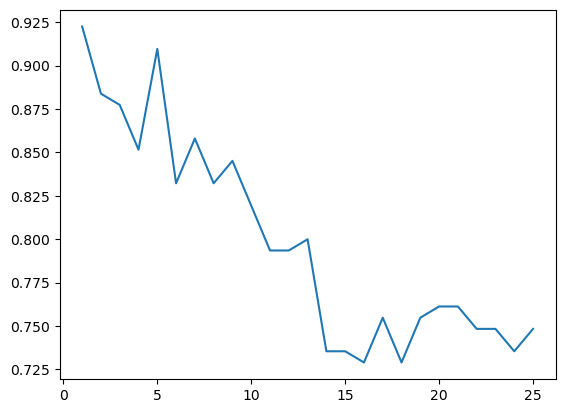

In [299]:
k_range = list(range(1, 26))
scores = []
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
plt.plot(k_range, scores)
plt.show()

In [300]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=False).split(range(25))

In [301]:
print('{} {:^61} {}'.format('Iteration', 'Training set observations', 'Testing set observations'))
for iteration, data in enumerate(kf, start=1):
    print('{:^9} {} {:^25}'.format(iteration, data[0], str(data[1])))

Iteration                   Training set observations                   Testing set observations
    1     [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [0 1 2 3 4]       
    2     [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [5 6 7 8 9]       
    3     [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24]     [10 11 12 13 14]     
    4     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24]     [15 16 17 18 19]     
    5     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]     [20 21 22 23 24]     


In [302]:
from sklearn.model_selection import cross_val_score

In [303]:
knn_gridsearch_cv = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

[0.71153846 0.80769231 0.80769231 0.76923077 0.63461538 0.76923077
 0.88235294 0.88235294 0.80392157 0.76470588]


In [304]:
print(scores.mean())

0.7833333333333333


[0.928657616892911, 0.8976998491704375, 0.9150075414781298, 0.8763574660633484, 0.8822021116138764, 0.8745475113122172, 0.8783182503770739, 0.8395550527903468, 0.8395927601809955, 0.820211161387632, 0.8163650075414781, 0.8066742081447963, 0.796945701357466, 0.7930618401206636, 0.7968702865761689, 0.7833333333333333, 0.791101055806938, 0.7852941176470587, 0.7852187028657617, 0.7735671191553545, 0.7812594268476621, 0.77552790346908, 0.7851809954751131, 0.7793740573152338, 0.7833333333333333, 0.7716817496229261, 0.7813725490196077, 0.7794494720965309, 0.7619532428355957, 0.7639140271493212]


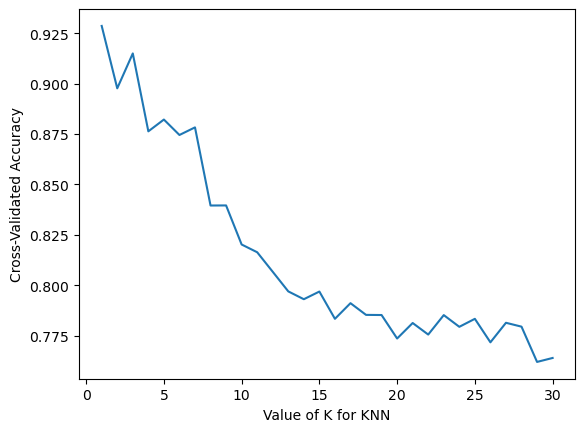

In [305]:
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [306]:
knn = KNeighborsClassifier(n_neighbors=20)
print(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

0.7735671191553545


In [307]:
from sklearn.model_selection import GridSearchCV

In [308]:
k_range = list(range(1, 31))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [309]:
param_grid_knn = dict(n_neighbors=k_range)
print(param_grid_knn)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [310]:
knn_grid = GridSearchCV(knn, param_grid_knn, cv=10, scoring='accuracy', return_train_score=False)
knn_grid.fit(x, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=20),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

In [311]:
grid_mean_scores = grid.cv_results_['mean_test_score']
print(grid_mean_scores)

AttributeError: 'dict' object has no attribute 'cv_results_'

In [ ]:
knn_grid.cv_results_

In [312]:
# best parameters

best_parameters_knn = knn_grid.best_params_
print(best_parameters_knn)

{'n_neighbors': 1}


In [313]:
# highest accuracy

highest_accuracy_knn = knn_grid.best_score_
print(highest_accuracy_knn)

0.928657616892911


In [314]:
# loading the results to pandas dataframe
result_knn = pd.DataFrame(knn_grid.cv_results_)

In [315]:
result_knn.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002005,0.000900,0.005245,0.003260,1,{'n_neighbors': 1},0.884615,0.884615,0.923077,0.923077,0.826923,0.942308,0.980392,1.000000,1.000000,0.921569,0.928658,0.052330,1
1,0.001396,0.001197,0.004278,0.004327,2,{'n_neighbors': 2},0.826923,0.884615,0.923077,0.865385,0.750000,0.923077,0.960784,0.980392,0.921569,0.941176,0.897700,0.065273,3
2,0.003124,0.006249,0.004686,0.007159,3,{'n_neighbors': 3},0.865385,0.884615,0.942308,0.903846,0.788462,0.961538,0.960784,1.000000,0.941176,0.901961,0.915008,0.057105,2
3,0.000000,0.000000,0.006249,0.007653,4,{'n_neighbors': 4},0.788462,0.846154,0.923077,0.865385,0.750000,0.884615,0.960784,0.960784,0.862745,0.921569,0.876357,0.065925,6
4,0.001562,0.004686,0.003124,0.006249,5,{'n_neighbors': 5},0.788462,0.807692,0.923077,0.865385,0.807692,0.884615,0.960784,0.980392,0.882353,0.921569,0.882202,0.062623,4


In [316]:
grid_search_result_knn = result_knn[['param_n_neighbors', 'mean_test_score']]

In [317]:
grid_search_result_knn

,param_n_neighbors,mean_test_score
0,1,0.928658
1,2,0.897700
2,3,0.915008
3,4,0.876357
4,5,0.882202
5,6,0.874548
6,7,0.878318
7,8,0.839555
8,9,0.839593
9,10,0.820211


Highest Accuracy = 92.86%

Best Parameters = {'n_neighbors':1}

# GridSearchCV using Random Forest

In [318]:
x = diabetes_dataset_no_outliers.drop(columns='Class_Positive', axis=1)
y = diabetes_dataset_no_outliers['Class_Positive']

In [319]:
x

,Age,Gender_Male,Polyuria_Yes,Polydipsia_Yes,Sudden Weight Loss_Yes,weakness_Yes,Polyphagia_Yes,Genital thrush_Yes,visual blurring_Yes,Itching_Yes,Irritability_Yes,delayed healing_Yes,partial paresis_Yes,muscle stiffness_Yes,Alopecia_Yes,Obesity_Yes
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0


In [320]:
y

0      1
1      1
2      1
3      1
4      1
      ..
515    1
516    1
517    1
518    0
519    0
Name: Class_Positive, Length: 516, dtype: int64

In [321]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [322]:
model_rfc_gscv = RandomForestClassifier(random_state=42)

In [323]:
parameters = { 
    'n_estimators': [200, 500],
    #'max_features': ['auto', 'sqrt', 'log2'],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [324]:
classifier_rfc = GridSearchCV(estimator=model_rfc_gscv, param_grid=parameters, cv=5)


In [325]:
grid_search_rfc = GridSearchCV(estimator = model_rfc_gscv, param_grid = parameters, scoring = 'accuracy', cv = 5)


In [326]:
grid_search_rfc.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [200, 500]},
             scoring='accuracy')

In [327]:
grid_search_rfc.cv_results_

{'mean_fit_time': array([0.24188905, 0.6021482 , 0.23927779, 0.59554429, 0.24800186,
        0.61779408, 0.25586352, 0.64355054, 0.25103588, 0.62423868,
        0.25143857, 0.63982506, 0.26649818, 0.65479364, 0.26329556,
        0.67093906, 0.25600572, 0.64455996, 0.26962814, 0.6489007 ,
        0.2609447 , 0.63936086, 0.25706611, 0.63657498, 0.26081047,
        0.64793086, 0.25675373, 0.66720104, 0.25917039, 0.65535946,
        0.25726399, 0.6626523 , 0.27645302, 0.67662053, 0.26244955,
        0.66922636, 0.25881438, 0.68296213, 0.28205833, 0.71110539]),
 'std_fit_time': array([0.0052506 , 0.00701722, 0.00660853, 0.01033305, 0.00607284,
        0.00857289, 0.01085706, 0.0213722 , 0.00114471, 0.00673253,
        0.00753207, 0.0114427 , 0.0121201 , 0.01149299, 0.00996553,
        0.02322551, 0.0079835 , 0.02360329, 0.00587311, 0.00678107,
        0.00601895, 0.00493942, 0.0083773 , 0.00768623, 0.0088947 ,
        0.00611751, 0.00723737, 0.02191631, 0.00808004, 0.02660817,
        0.006

In [328]:
# best parameters

best_parameters_rfc = grid_search_rfc.best_params_
print(best_parameters_rfc)

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 200}


In [329]:
# highest accuracy

highest_accuracy_rfc = grid_search_rfc.best_score_
print(highest_accuracy_rfc)

0.9584094368340944


In [330]:
# loading the results to pandas dataframe
result_rfc = pd.DataFrame(grid_search_rfc.cv_results_)

In [331]:
result_rfc.head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.241889,0.005251,0.017608,0.007817,gini,4,sqrt,200,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.931507,0.875000,0.902778,0.916667,0.930556,0.911301,0.020968,37
1,0.602148,0.007017,0.037634,0.006134,gini,4,sqrt,500,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.931507,0.861111,0.875000,0.930556,0.958333,0.911301,0.036954,39


In [332]:
grid_search_result_rfc = result_rfc[['param_criterion', 'param_max_depth', 'param_max_features', 'param_n_estimators',
                                    'mean_test_score']]

In [333]:
grid_search_result_rfc

,param_criterion,param_max_depth,param_max_features,param_n_estimators,mean_test_score
0,gini,4,sqrt,200,0.911301
1,gini,4,sqrt,500,0.911301
2,gini,4,log2,200,0.911301
3,gini,4,log2,500,0.911301
4,gini,5,sqrt,200,0.944635
5,gini,5,sqrt,500,0.939041
6,gini,5,log2,200,0.944635
7,gini,5,log2,500,0.939041
8,gini,6,sqrt,200,0.947374
9,gini,6,sqrt,500,0.944597


Highest Accuracy = 95.84%

Best Parameters = {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 200}

Best Parameters = {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'log2', 'n_estimators': 200}

In [334]:
rfc1 = RandomForestClassifier(random_state=42, max_features='sqrt', n_estimators= 200, max_depth=8, criterion='entropy')

In [335]:
rfc1.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=200,
                       random_state=42)

In [336]:
pred_rfc = rfc1.predict(x_test)

In [337]:
print("Accuracy for Random Forest on CV data: ", accuracy_score(y_test, pred_rfc))

Accuracy for Random Forest on CV data:  0.9935483870967742


# GridSearchCV with DecisionTreeClassifier

In [338]:
tree_clas = DecisionTreeClassifier(random_state=1024)

In [339]:
parameters_dtree = {
    #'max_features': ['auto', 'sqrt', 'log2'],
    'max_features': ['sqrt', 'log2'],
    'ccp_alpha': [0.1, .01, .001],
    'max_depth' : [5, 6, 7, 8, 9],
    'criterion' :['gini', 'entropy']
}

In [340]:
grid_search_dtree = GridSearchCV(estimator=tree_clas, param_grid=parameters_dtree, cv=5, verbose=True)

In [341]:
grid_search_dtree.fit(x_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1024),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['sqrt', 'log2']},
             verbose=True)

In [342]:
grid_search_dtree.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=9,
                       max_features='sqrt', random_state=1024)

In [343]:
grid_search_dtree_clas_best = DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=9,
                       max_features='sqrt', random_state=1024)

# class_weight=None,
# max_leaf_nodes=None,
# min_impurity_decrease=0.0,
# min_impurity_split=None,
# min_samples_leaf=1,
# min_samples_split=2,
# min_weight_fraction_leaf=0.0,
# presort='deprecated',
# splitter='best'

In [344]:
grid_search_dtree_clas_best.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=9,
                       max_features='sqrt', random_state=1024)

In [345]:
y_predict = grid_search_dtree_clas_best.predict(x_test)